# Libraries & Definitions

In [58]:
"""Math & Data Libraries"""
import numpy as np
import pandas as pd
import geopandas as gpd

"""Visualization Libraries"""
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
from pandas.plotting import parallel_coordinates

"""Machine Learning Libraries"""
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree

"""GIS Libraries"""
import rasterio
from rasterio.features import sieve
import xarray as xr
import rioxarray

In [59]:
data_folder = "C:\\Users\\magai\\Desktop\\master thesis\\sentinell2\\S2B_MSIL2A_20230508T100559_N0509_R022_T33UVU_20230508T131238.Berlin\\GRANULE\\"

# Input Data

In [60]:
input_image =  data_folder + "cropped_image_berlin_20m.tif"

In [61]:
rio_array = rioxarray.open_rasterio(input_image)
rio_map = rio_array.stack(z=['y','x']).transpose('z','band')
rio_map = rio_map.to_numpy()
rio_map = rio_map[:, 1:]/10000

In [62]:
rio_array.shape

(10, 2364, 2570)

In [63]:
rio_map.shape

(6075480, 9)

In [64]:
rio_map.shape[0]/2570

2364.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


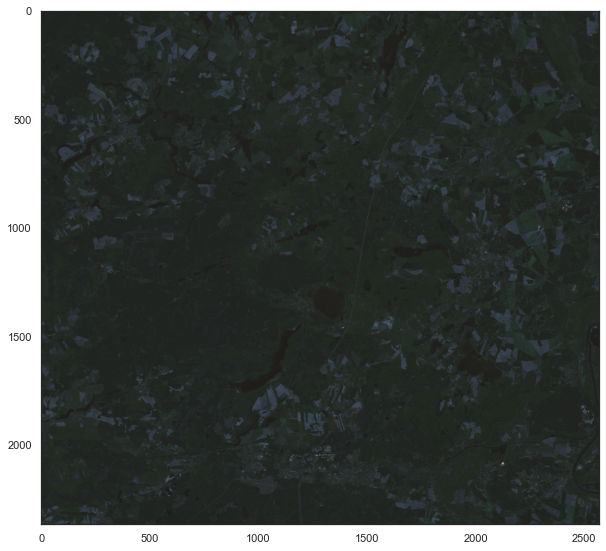

In [65]:
# Visualize map
rgb = np.zeros((2364, 2570, 3))
for i in range(3):
    rgb[:,:,i] = rio_array[i+1]/10000

plt.figure(figsize=(10,10))
plt.imshow(rgb)
plt.show()

In [66]:
df_bands = pd.read_csv("C:\\Users\\magai\\Desktop\\master thesis\\sentinell2\\S2B_MSIL2A_20230508T100559_N0509_R022_T33UVU_20230508T131238.Berlin\\GRANULE\\random_points_df.csv").reset_index().drop(["index"], axis=1)
df_metadata = pd.read_csv("C:\\Users\\magai\\Desktop\\master thesis\\sentinell2\\S2B_MSIL2A_20230508T100559_N0509_R022_T33UVU_20230508T131238.Berlin\\GRANULE\\random_points.csv").reset_index().drop(["index"], axis=1)

In [67]:
df_bands

,blue,green,red,rededge1,rededge2,rededge3,NIR,SWIR1,SWIR2
0,0.1170,0.1305,0.1589,0.1347,0.2096,0.3191,0.3458,0.2817,0.1998
1,0.1213,0.1284,0.1430,0.1310,0.1679,0.2638,0.2963,0.2248,0.1666
2,0.1213,0.1284,0.1430,0.1310,0.1679,0.2638,0.2963,0.2248,0.1666
3,0.1213,0.1284,0.1430,0.1310,0.1679,0.2638,0.2963,0.2248,0.1666
4,0.1213,0.1284,0.1430,0.1310,0.1679,0.2638,0.2963,0.2248,0.1666
...,...,...,...,...,...,...,...,...,...
14527,0.1250,0.1309,0.1625,0.1333,0.2067,0.3249,0.3516,0.2679,0.1909
14528,0.1250,0.1309,0.1625,0.1333,0.2067,0.3249,0.3516,0.2679,0.1909
14529,0.1250,0.1309,0.1625,0.1333,0.2067,0.3249,0.3516,0.2679,0.1909
14530,0.1250,0.1309,0.1625,0.1333,0.2067,0.3249,0.3516,0.2679,0.1909


In [68]:
df_metadata

,fid,Explorator,EP,tree_id,x,y,species,d,h,v,year,bs,bb,bl,btot,agb_mg,btov_ratio,gsv_m3,geometry,category
0,SCH,SEW35,SEW35_0212,0.000,0.000,Fagus_sylvatica,9.0,9.01,0.0219,2015,12.7062,3.8557,0.9717,17.5336,0.0175,0.7991,0.0219,c(422892.585932303,5863017.56976794),broadleaves
1,SCH,SEW01,SEW01_0006,9.762,21.139,Pinus_sylvestris,14.0,16.10,0.1199,2016,62.5946,10.7823,1.8890,75.2659,0.0753,0.6280,0.1199,c(422413.946250618,5861885.04083601),conifer
2,SCH,SEW01,SEW01_0007,11.168,22.497,Pinus_sylvestris,12.6,15.39,0.0942,2016,48.1443,7.6635,1.4547,57.2625,0.0573,0.6083,0.0942,c(422415.458855826,5861886.27519459),conifer
3,SCH,SEW01,SEW01_0009,12.167,25.581,Pinus_sylvestris,29.2,20.13,0.6050,2016,348.2084,128.2867,12.9279,489.4230,0.4894,0.8089,0.6050,c(422416.710300841,5861889.2613513),conifer
4,SCH,SEW01,SEW01_0010,11.664,30.477,Pinus_sylvestris,17.4,17.46,0.1957,2016,105.9737,22.0831,3.2816,131.3384,0.1313,0.6709,0.1957,c(422416.617920408,5861894.17620597),conifer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14527,SCH,SEW50,SEW50_0224,8.767,13.859,Fagus_sylvatica,68.2,41.09,7.8311,2015,4484.0952,1396.8088,72.0262,5952.9302,5.9529,0.7602,7.8311,c(418670.000077666,5877372.09563765),broadleaves
14528,SCH,SEW50,SEW50_0225,6.104,12.527,Fagus_sylvatica,12.5,13.48,0.0746,2015,40.1021,8.5313,1.6440,50.2774,0.0503,0.6743,0.0746,c(418667.238271471,5877370.99233286),broadleaves
14529,SCH,SEW50,SEW50_0226,7.630,10.714,Fagus_sylvatica,65.4,40.54,7.0749,2015,4062.2624,1213.7632,64.5961,5340.6217,5.3406,0.7549,7.0749,c(418668.605674955,5877369.06034154),broadleaves
14530,SCH,SEW50,SEW50_0227,6.993,9.623,Fagus_sylvatica,15.1,16.38,0.1372,2015,74.1438,13.9940,2.3170,90.4548,0.0905,0.6596,0.1372,c(418667.880517515,5877368.02766185),broadleaves


## Aggregate data

In [69]:
df_aggregated = df_bands.drop_duplicates()
df_aggregated.shape

(1319, 9)

There are 1319 unique pixels in Berlin data

In [70]:
df_aggregated

,blue,green,red,rededge1,rededge2,rededge3,NIR,SWIR1,SWIR2
0,0.1170,0.1305,0.1589,0.1347,0.2096,0.3191,0.3458,0.2817,0.1998
1,0.1213,0.1284,0.1430,0.1310,0.1679,0.2638,0.2963,0.2248,0.1666
10,0.1209,0.1296,0.1437,0.1308,0.1671,0.2704,0.2985,0.2237,0.1654
27,0.1215,0.1286,0.1408,0.1297,0.1652,0.2604,0.2948,0.2244,0.1667
82,0.1207,0.1292,0.1429,0.1302,0.1671,0.2730,0.2988,0.2248,0.1656
...,...,...,...,...,...,...,...,...,...
14495,0.1250,0.1281,0.1599,0.1305,0.1961,0.3050,0.3434,0.2562,0.1783
14504,0.1250,0.1312,0.1634,0.1337,0.2049,0.3225,0.3380,0.2690,0.1913
14509,0.1252,0.1279,0.1483,0.1315,0.1908,0.2906,0.3199,0.2596,0.1856
14518,0.1255,0.1310,0.1641,0.1344,0.2061,0.3256,0.3515,0.2776,0.1946


In [71]:
df_bands_pixel = df_bands.copy()

for i, pixel_bands in enumerate(df_aggregated.values):
    df_bands_pixel.loc[np.where(np.sum(df_bands.values==pixel_bands, axis=1)==9, True, False), ["Pixel"]] = i
df_bands_pixel

,blue,green,red,rededge1,rededge2,rededge3,NIR,SWIR1,SWIR2,Pixel
0,0.1170,0.1305,0.1589,0.1347,0.2096,0.3191,0.3458,0.2817,0.1998,0.0
1,0.1213,0.1284,0.1430,0.1310,0.1679,0.2638,0.2963,0.2248,0.1666,1.0
2,0.1213,0.1284,0.1430,0.1310,0.1679,0.2638,0.2963,0.2248,0.1666,1.0
3,0.1213,0.1284,0.1430,0.1310,0.1679,0.2638,0.2963,0.2248,0.1666,1.0
4,0.1213,0.1284,0.1430,0.1310,0.1679,0.2638,0.2963,0.2248,0.1666,1.0
...,...,...,...,...,...,...,...,...,...,...
14527,0.1250,0.1309,0.1625,0.1333,0.2067,0.3249,0.3516,0.2679,0.1909,1285.0
14528,0.1250,0.1309,0.1625,0.1333,0.2067,0.3249,0.3516,0.2679,0.1909,1285.0
14529,0.1250,0.1309,0.1625,0.1333,0.2067,0.3249,0.3516,0.2679,0.1909,1285.0
14530,0.1250,0.1309,0.1625,0.1333,0.2067,0.3249,0.3516,0.2679,0.1909,1285.0


In [72]:
df_metadata_pixel = df_metadata.copy()
df_metadata_pixel["Pixel"] = df_bands_pixel["Pixel"]
df_metadata_pixel

,fid,Explorator,EP,tree_id,x,y,species,d,h,v,...,bs,bb,bl,btot,agb_mg,btov_ratio,gsv_m3,geometry,category,Pixel
0,SCH,SEW35,SEW35_0212,0.000,0.000,Fagus_sylvatica,9.0,9.01,0.0219,2015,...,3.8557,0.9717,17.5336,0.0175,0.7991,0.0219,c(422892.585932303,5863017.56976794),broadleaves,0.0
1,SCH,SEW01,SEW01_0006,9.762,21.139,Pinus_sylvestris,14.0,16.10,0.1199,2016,...,10.7823,1.8890,75.2659,0.0753,0.6280,0.1199,c(422413.946250618,5861885.04083601),conifer,1.0
2,SCH,SEW01,SEW01_0007,11.168,22.497,Pinus_sylvestris,12.6,15.39,0.0942,2016,...,7.6635,1.4547,57.2625,0.0573,0.6083,0.0942,c(422415.458855826,5861886.27519459),conifer,1.0
3,SCH,SEW01,SEW01_0009,12.167,25.581,Pinus_sylvestris,29.2,20.13,0.6050,2016,...,128.2867,12.9279,489.4230,0.4894,0.8089,0.6050,c(422416.710300841,5861889.2613513),conifer,1.0
4,SCH,SEW01,SEW01_0010,11.664,30.477,Pinus_sylvestris,17.4,17.46,0.1957,2016,...,22.0831,3.2816,131.3384,0.1313,0.6709,0.1957,c(422416.617920408,5861894.17620597),conifer,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14527,SCH,SEW50,SEW50_0224,8.767,13.859,Fagus_sylvatica,68.2,41.09,7.8311,2015,...,1396.8088,72.0262,5952.9302,5.9529,0.7602,7.8311,c(418670.000077666,5877372.09563765),broadleaves,1285.0
14528,SCH,SEW50,SEW50_0225,6.104,12.527,Fagus_sylvatica,12.5,13.48,0.0746,2015,...,8.5313,1.6440,50.2774,0.0503,0.6743,0.0746,c(418667.238271471,5877370.99233286),broadleaves,1285.0
14529,SCH,SEW50,SEW50_0226,7.630,10.714,Fagus_sylvatica,65.4,40.54,7.0749,2015,...,1213.7632,64.5961,5340.6217,5.3406,0.7549,7.0749,c(418668.605674955,5877369.06034154),broadleaves,1285.0
14530,SCH,SEW50,SEW50_0227,6.993,9.623,Fagus_sylvatica,15.1,16.38,0.1372,2015,...,13.9940,2.3170,90.4548,0.0905,0.6596,0.1372,c(418667.880517515,5877368.02766185),broadleaves,1285.0


In [73]:
conifer_percentages = np.zeros(df_aggregated.shape[0])
broadleaf_percentages = np.zeros(df_aggregated.shape[0])
category_aggregated = np.zeros(df_aggregated.shape[0], dtype = object)

for pixel_i in np.arange(df_aggregated.shape[0]):
    subset_value_counts = df_metadata_pixel[df_metadata_pixel["Pixel"]==pixel_i]["category"].value_counts(normalize = True)
    if(subset_value_counts.shape[0]==0):
        print(pixel_i, subset_value_counts.shape[0])
    for category in subset_value_counts.index:
        if(category == "conifer"):
            conifer_percentages[pixel_i] = subset_value_counts[category]
        if(category == "broadleaves"):
            broadleaf_percentages[pixel_i] = subset_value_counts[category]
        if(subset_value_counts[category]>=0.5):
            category_aggregated[pixel_i] = category

In [74]:
len(conifer_percentages), len(broadleaf_percentages), len(category_aggregated)

(1319, 1319, 1319)

In [75]:
df_aggregated["Pixel"] = np.arange(df_aggregated.shape[0])
df_aggregated["conifer %"] = conifer_percentages
df_aggregated["broadleaves %"] = broadleaf_percentages
df_aggregated["category"] = category_aggregated

<ipython-input-75-a797b3a347a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aggregated["Pixel"] = np.arange(df_aggregated.shape[0])
<ipython-input-75-a797b3a347a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aggregated["conifer %"] = conifer_percentages
<ipython-input-75-a797b3a347a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [76]:
df_aggregated

,blue,green,red,rededge1,rededge2,rededge3,NIR,SWIR1,SWIR2,Pixel,conifer %,broadleaves %,category
0,0.1170,0.1305,0.1589,0.1347,0.2096,0.3191,0.3458,0.2817,0.1998,0,0.000000,1.000000,broadleaves
1,0.1213,0.1284,0.1430,0.1310,0.1679,0.2638,0.2963,0.2248,0.1666,1,0.979592,0.020408,conifer
10,0.1209,0.1296,0.1437,0.1308,0.1671,0.2704,0.2985,0.2237,0.1654,2,1.000000,0.000000,conifer
27,0.1215,0.1286,0.1408,0.1297,0.1652,0.2604,0.2948,0.2244,0.1667,3,1.000000,0.000000,conifer
82,0.1207,0.1292,0.1429,0.1302,0.1671,0.2730,0.2988,0.2248,0.1656,4,1.000000,0.000000,conifer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14495,0.1250,0.1281,0.1599,0.1305,0.1961,0.3050,0.3434,0.2562,0.1783,1314,0.000000,1.000000,broadleaves
14504,0.1250,0.1312,0.1634,0.1337,0.2049,0.3225,0.3380,0.2690,0.1913,1315,0.000000,1.000000,broadleaves
14509,0.1252,0.1279,0.1483,0.1315,0.1908,0.2906,0.3199,0.2596,0.1856,1316,0.000000,1.000000,broadleaves
14518,0.1255,0.1310,0.1641,0.1344,0.2061,0.3256,0.3515,0.2776,0.1946,1317,0.000000,1.000000,broadleaves


In [77]:
X = df_aggregated.values[:, :9]
y = df_aggregated["category"].values.astype(str)

In [78]:
print(X.shape)
print(y.shape)

(1319, 9)
(1319,)


Plot spectral signature of training data

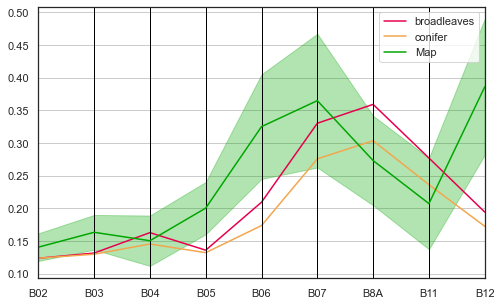

In [79]:
df_train = pd.DataFrame(X, columns = ['B02','B03','B04','B05','B06','B07','B8A','B11','B12'])

df_y = pd.DataFrame(y, columns = ['CLASS'])
df_dataset = pd.concat([df_y, df_train], axis=1)

df_mean = df_dataset.groupby('CLASS').mean()
df_mean["CLASS"] = df_mean.index

df_map = pd.DataFrame(rio_map, columns = ['B02','B03','B04','B05','B06','B07','B8A','B11','B12'])

plt.figure(figsize=(8,5))
parallel_coordinates(df_mean, "CLASS", color=("#e6004d", "#f2a64d", "#ffd24d", "#e6e64d","#80ff00","#00a600", "#80f2e6"))
plt.plot(df_map.mean(), color = "#00a600", label = "Map")
plt.fill_between(np.arange(9), df_map.mean()-df_map.std(), df_map.mean()+df_map.std(), color = "#00a600", alpha = 0.3)
plt.legend()

## Preprocess Data

### Split into Training and Test set

In [80]:
# We split the data into a training set (80%) and a test (or validation) set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardize Data

In [81]:
X_train_norm = X_train
X_test_norm = X_test
rio_map_norm = rio_map

In [82]:
# # Standardize features by removing the mean and divide through the standard deviation
# scaler = StandardScaler()
# X_train_norm = scaler.fit_transform(X_train)
# X_test_norm = scaler.transform(X_test)

# rio_map_norm = scaler.transform(rio_map)

In [83]:
print(X_train_norm.shape)
print(y_train.shape)

(1055, 9)
(1055,)


### Balance Dataset

In [84]:
# Summarize class distribution
df_y = pd.DataFrame(y_train, columns = ['Class'])
df_y.groupby(["Class"])["Class"].count().reset_index(name="count")

,Class,count
0,broadleaves,698
1,conifer,357


In [85]:
# Unbalance data
X_train_norm_smote, y_train_smote = X_train_norm, y_train

In [29]:
sm = SMOTE(sampling_strategy='auto', 
           k_neighbors=8, 
           random_state=100)

X_train_norm_smote, y_train_smote = sm.fit_resample(X_train_norm, y_train.ravel())

In [86]:
# Summarize class distribution
df_y = pd.DataFrame(y_train_smote, columns = ['Class'])
df_y.groupby(["Class"])["Class"].count().reset_index(name="count")

,Class,count
0,broadleaves,698
1,conifer,357


### Remove outliers

In [87]:
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train_norm_smote)

mask = yhat != -1
X_train_norm_smote, y_train_smote = X_train_norm_smote[mask, :], y_train_smote[mask]

# Summarize class distribution
df_y = pd.DataFrame(y_train_smote, columns = ['Class'])
df_y.groupby(["Class"])["Class"].count().reset_index(name="count")

,Class,count
0,broadleaves,690
1,conifer,354


# Model Training

### Hyperparameter Tuning (Calibration)

In [88]:
%%time
rfc=RandomForestClassifier(random_state=12345)

parameter_space = { 
    'n_estimators': [64, 128],
#    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2, 4, 8, 16, 36],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(rfc,
                      parameter_space,
                      n_jobs = -1,
                      cv = 3)

CV_rfc.fit(X_train_norm_smote, y_train_smote)

print("Best: %f using %s \n" % (CV_rfc.best_score_, CV_rfc.best_params_))
means = CV_rfc.cv_results_['mean_test_score']
stds = CV_rfc.cv_results_['std_test_score']
params = CV_rfc.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))   

Best: 0.944444 using {'criterion': 'entropy', 'max_depth': 16, 'n_estimators': 64} 

0.933908 (0.004693) with: {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 64}
0.935824 (0.007168) with: {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 128}
0.941571 (0.009482) with: {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 64}
0.940613 (0.010580) with: {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 128}
0.938697 (0.013341) with: {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 64}
0.939655 (0.012191) with: {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 128}
0.938697 (0.012922) with: {'criterion': 'gini', 'max_depth': 16, 'n_estimators': 64}
0.940613 (0.015622) with: {'criterion': 'gini', 'max_depth': 16, 'n_estimators': 128}
0.938697 (0.012922) with: {'criterion': 'gini', 'max_depth': 36, 'n_estimators': 64}
0.940613 (0.015622) with: {'criterion': 'gini', 'max_depth': 36, 'n_estimators': 128}
0.933908 (0.004693) with: {'criterion': 'entropy', 'max_depth': 2,

In [89]:
rf_clf = RandomForestClassifier(random_state=12345,
                        max_features = 'sqrt',        
                        n_estimators = CV_rfc.best_params_["n_estimators"],
                        max_depth = CV_rfc.best_params_["max_depth"],
                        criterion = CV_rfc.best_params_["criterion"])
                     
rf_clf.fit(X_train_norm_smote, y_train_smote)

RandomForestClassifier(criterion='entropy', max_depth=16, n_estimators=64,
                       random_state=12345)

#### Visualize a tree from the forest with the best parameter settings

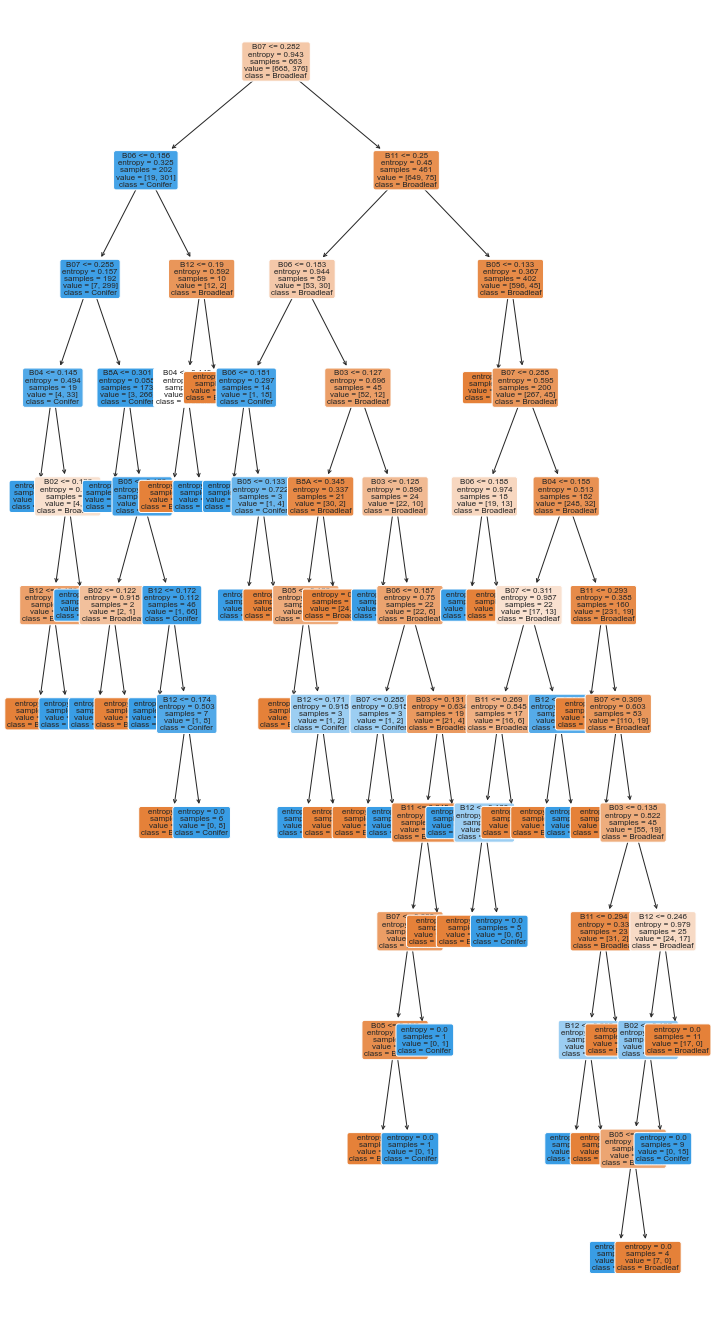

In [90]:
# for a monthly acquisition with 10 original bands:
features = ['B02','B03','B04','B05','B06','B07','B8A','B11','B12']

classes = ["Broadleaf", "Conifer"]

k = 3  # index of a decision tree
plt.figure(figsize=(12,24))
tree.plot_tree(CV_rfc.best_estimator_.estimators_[k],
                   feature_names = features,
                   class_names = classes,
                   fontsize=8, 
                   filled=True, 
                   rounded=True)
plt.savefig("C:\\Users\\magai\\Desktop\\master thesis\\plots from python\\berlin\\classification unbalance data\\output_plot.png")
plt.show()

#### Plotting feature importance values

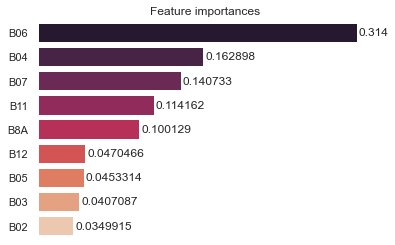

In [91]:
features_df = pd.DataFrame({'features': features, 'importances': rf_clf.feature_importances_ })

# Sorting data from highest to lowest
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

# Barplot of the result without borders and axis lines
g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)
g.set_title('Feature importances')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

## Classification

### Performance Evaluation

In [92]:
from sklearn.metrics import classification_report

y_pred_train = rf_clf.predict(X_train_norm_smote)
print("Training set")
print(classification_report(y_train_smote, y_pred_train))
print()

y_pred_test = rf_clf.predict(X_test_norm)
print("Test set")
print(classification_report(y_test, y_pred_test))
print()

Training set
              precision    recall  f1-score   support

 broadleaves       1.00      1.00      1.00       690
     conifer       1.00      1.00      1.00       354

    accuracy                           1.00      1044
   macro avg       1.00      1.00      1.00      1044
weighted avg       1.00      1.00      1.00      1044


Test set
              precision    recall  f1-score   support

 broadleaves       0.96      0.98      0.97       174
     conifer       0.96      0.91      0.94        90

    accuracy                           0.96       264
   macro avg       0.96      0.95      0.95       264
weighted avg       0.96      0.96      0.96       264




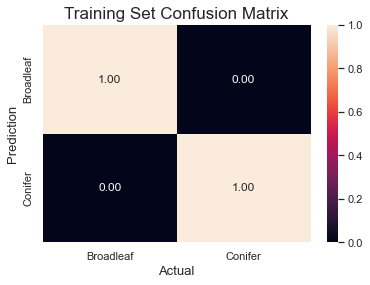

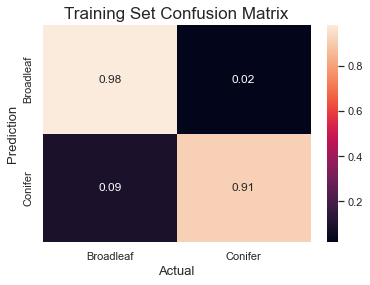

In [93]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_train_smote, y_pred_train, normalize = "true")
sns.heatmap(conf_matrix,
            annot=True,
            fmt='.2f',
            xticklabels=classes,
            yticklabels=classes,
    )
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Training Set Confusion Matrix',fontsize=17)
plt.show()

conf_matrix = confusion_matrix(y_test, y_pred_test, normalize = "true")
sns.heatmap(conf_matrix,
            annot=True,
            fmt='.2f',
            xticklabels=classes,
            yticklabels=classes,
    )
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Training Set Confusion Matrix',fontsize=17)
plt.show()

In [94]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calculate_scores(y_test, y_pred, average = "binary"):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average = average)
    recall = recall_score(y_test, y_pred, average = average)
    f1 = f1_score(y_test, y_pred, average = average)
    return [accuracy, precision, recall, f1]

In [95]:
y_test[y_test=="conifer"] = 1
y_test[y_test=="broadleaves"] = 0

y_pred_test[y_pred_test=="conifer"] = 1
y_pred_test[y_pred_test=="broadleaves"] = 0

y_test = y_test.astype(int)
y_pred_test = y_pred_test.astype(int)

results = calculate_scores(y_test, y_pred_test)

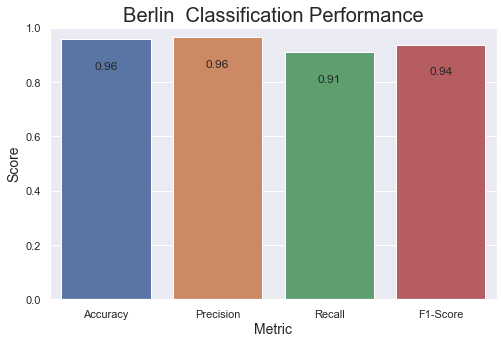

In [96]:
sns.set_theme()
fig, ax = plt.subplots(figsize = (8,5))
sns.barplot(y = results, x = ["Accuracy", "Precision", "Recall", "F1-Score"])

for p in ax.patches:
    h, w, x = p.get_height(), p.get_width(), p.get_x()
    xy = (x + w / 2., h-0.1)
    text = f'{h:0.2f}'
    ax.annotate(text=text, xy=xy, ha='center', va='center')
    
plt.title("Berlin  Classification Performance", fontsize = 20)
plt.xlabel("Metric", fontsize = 14)
plt.ylabel("Score", fontsize = 14)
plt.ylim(0,1)
plt.show()

sns.set_theme(style="white")

### Map Classification

In [97]:
map_predictions = rf_clf.predict(rio_map_norm)
classified_map = map_predictions.reshape(rio_array.shape[1:3])
classified_map

array([['conifer', 'conifer', 'conifer', ..., 'broadleaves', 'conifer',
        'broadleaves'],
       ['conifer', 'conifer', 'conifer', ..., 'broadleaves', 'conifer',
        'conifer'],
       ['conifer', 'conifer', 'conifer', ..., 'conifer', 'conifer',
        'conifer'],
       ...,
       ['broadleaves', 'broadleaves', 'broadleaves', ..., 'broadleaves',
        'broadleaves', 'broadleaves'],
       ['broadleaves', 'broadleaves', 'broadleaves', ..., 'broadleaves',
        'broadleaves', 'broadleaves'],
       ['broadleaves', 'broadleaves', 'broadleaves', ..., 'broadleaves',
        'broadleaves', 'broadleaves']], dtype='<U11')

In [98]:
classified_map[classified_map=="conifer"] = 2
classified_map[classified_map=="broadleaves"] = 1

In [99]:
classified_map = classified_map.astype(rasterio.uint16)
sieved = sieve(classified_map, size=4, connectivity=8)
sieved.shape

(2364, 2570)

In [100]:
np.unique(sieved, return_counts = True)

(array([1, 2], dtype=uint16), array([1946846, 4128634], dtype=int64))

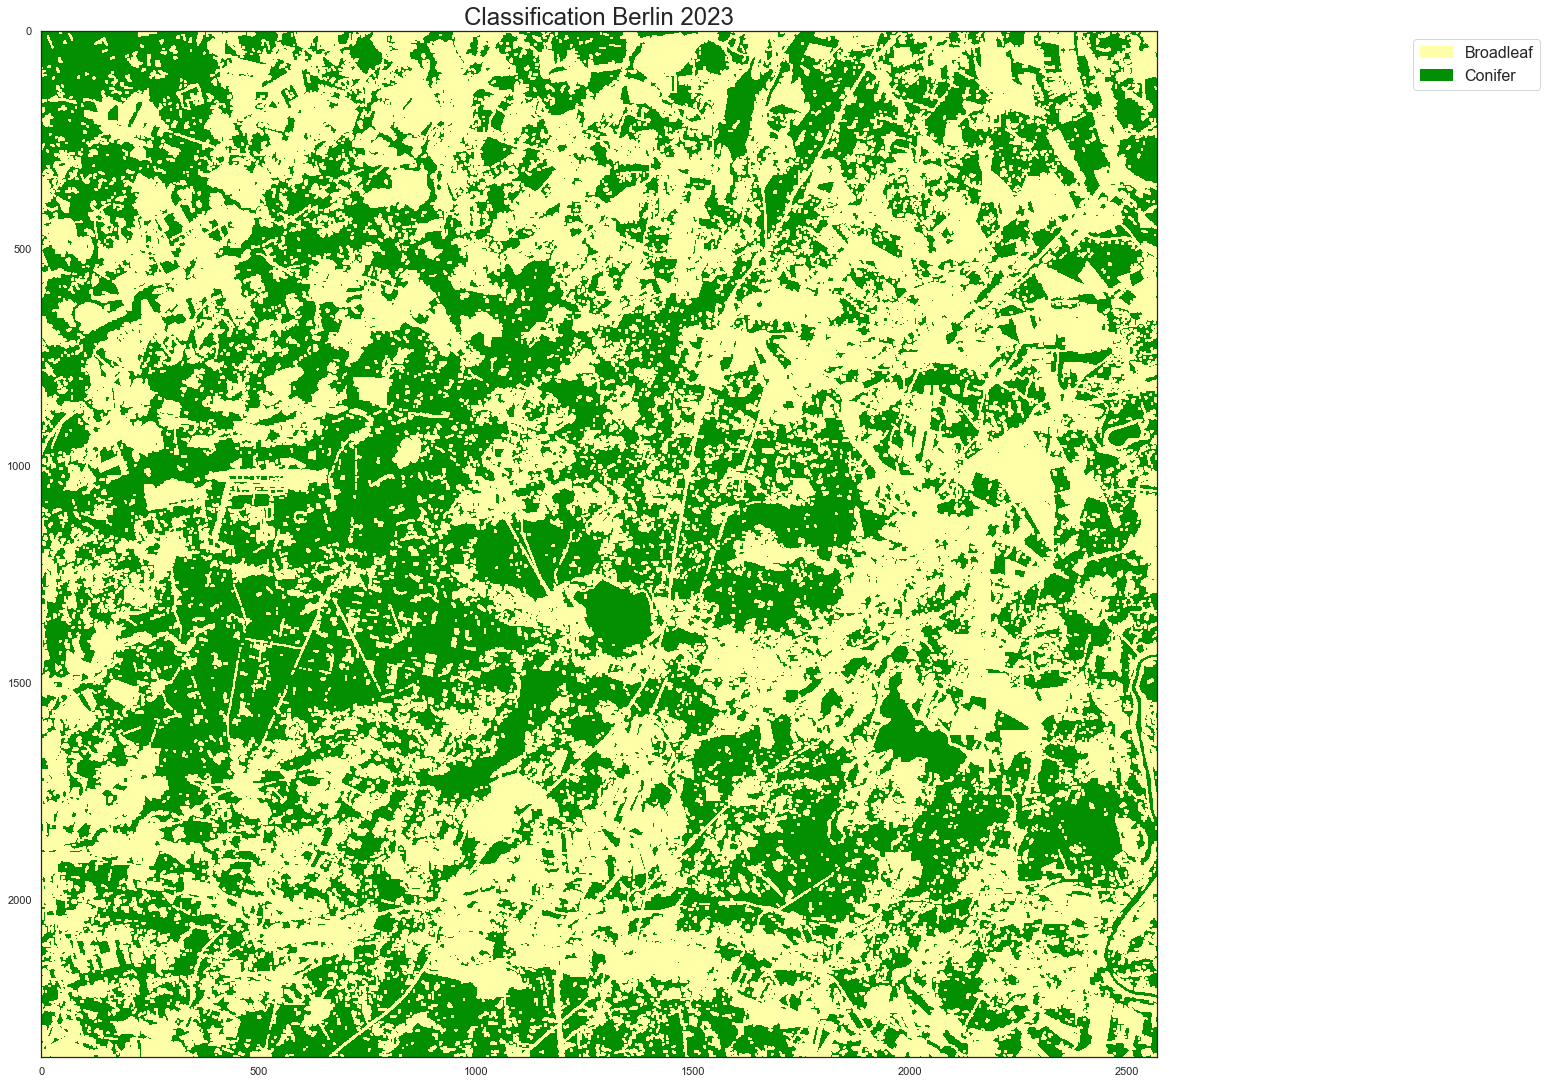

In [101]:
from matplotlib.patches import Patch
colors=["#ffffa8", "#028f02"]#, "#f2a64d", "#ffd24d", "#aee21d","#02c500","#028f02", "#80f2e6"]
levels=[1, 2] 

cmap, norm = matplotlib.colors.from_levels_and_colors(levels, colors, extend='max')
#cmap = matplotlib.colors.ListedColormap(colors)

fig, ax = plt.subplots(figsize=(20, 20))

chm_plot = ax.imshow(sieved,
                     cmap = cmap,                    
                     norm = norm)

ax.set_title("Classification Berlin 2023", fontsize=24)

# Add a legend for labels
legend_labels = {"#ffffa8": "Broadleaf", 
                 "#028f02": "Conifer"}

patches = [Patch(color=color, label=label)
           for color, label in legend_labels.items()]

ax.legend(handles=patches,
          bbox_to_anchor=(1.35, 1),
          facecolor="white",
          fontsize= 16)

# ax.set_axis_off()
plt.show()

### Save Map

In [102]:
# Define the CRS information for your image
from rasterio.crs import CRS
# Open the cropped image to get the spatial information
with rasterio.open("C:\\Users\\magai\\Desktop\\master thesis\\sentinell2\\S2B_MSIL2A_20230508T100559_N0509_R022_T33UVU_20230508T131238.Berlin\\GRANULE\\Berlin_Image_Test.tif") as src:
    # Retrieve the geotransform and coordinate reference system
    transform = src.transform
    crs = src.crs

    # Define the output path for the TIFF image
    output_path = "C:\\Users\\magai\\Desktop\\master thesis\\sentinell2\\S2B_MSIL2A_20230508T100559_N0509_R022_T33UVU_20230508T131238.Berlin\\GRANULE\\Berlin_Image_Test_classification.tif"

    # Open a new raster file in write mode
    with rasterio.open(output_path, 'w', driver='GTiff', width=sieved.shape[1], height=sieved.shape[0], count=1, dtype=sieved.dtype, crs=crs, transform=transform) as dst:
        # Write the image data to the file
        dst.write(sieved, 1)

# Forest Mask

In [103]:
df_forest_mask = gpd.read_file("C:\\Users\\magai\\Desktop\\master thesis\\sentinell2\\S2B_MSIL2A_20230508T100559_N0509_R022_T33UVU_20230508T131238.Berlin\\GRANULE\\Berlin_Forest_Mask.shp")

In [104]:
df_forest_mask

,ID,LAND,MODELLART,OBJART,OBJART_TXT,OBJID,HDU_X,BEGINN,ENDE,BEZ,NAM,VEG,ZUS,geometry
0,0,BB,Basis-DLM#DTK10#DTK25,43002,AX_Wald,DEBBATP000000REw,0,2018-07-25T09:11:21Z,None,None,None,1200,None,"POLYGON ((411910.000 5884604.400, 411724.800 5..."
1,0,BB,Basis-DLM#DTK10#DTK25,43002,AX_Wald,DEBBATP000000PWP,0,2019-03-27T14:43:23Z,None,None,None,1200,None,"POLYGON ((409974.360 5887946.895, 409917.156 5..."
2,0,BB,Basis-DLM#DTK10#DTK25,43002,AX_Wald,DEBBATP000000PcF,0,2019-03-27T14:43:23Z,None,None,None,1100,None,"POLYGON ((409810.073 5890735.263, 409799.329 5..."
3,0,BB,Basis-DLM#DTK10#DTK25,43002,AX_Wald,DEBBATP000000PYK,0,2019-03-27T14:43:23Z,None,None,None,1100,None,"POLYGON ((406622.812 5888289.615, 406630.100 5..."
4,0,BB,Basis-DLM#DTK10#DTK25,43002,AX_Wald,DEBBATP000000RU3,0,2012-06-19T11:40:57Z,None,None,None,1300,None,"POLYGON ((415945.961 5885115.482, 415953.100 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7422,0,BB,Basis-DLM#DTK10#DTK25,43002,AX_Wald,DEBBATP100001eQG,0,2019-09-13T05:13:10Z,None,None,None,1300,None,"POLYGON ((413806.124 5870214.443, 413790.374 5..."
7423,0,BB,Basis-DLM#DTK10#DTK25,43002,AX_Wald,DEBBATP100001f3t,0,2019-09-20T09:37:52Z,None,None,None,1300,None,"POLYGON ((429375.703 5857611.119, 429377.489 5..."
7424,0,BB,Basis-DLM#DTK10#DTK25,43002,AX_Wald,DEBBATP100001f4g,0,2019-09-20T05:17:31Z,None,None,None,1300,None,"POLYGON ((427750.974 5858157.375, 427689.200 5..."
7425,0,BB,Basis-DLM#DTK10#DTK25,43002,AX_Wald,DEBBATP100001f47,0,2019-09-20T09:37:52Z,None,None,None,1300,None,"POLYGON ((429125.700 5857972.000, 429147.500 5..."


<AxesSubplot:>

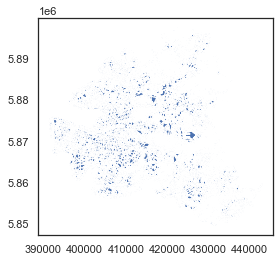

In [105]:
df_forest_mask.plot()

In [106]:
from shapely.ops import cascaded_union

boundary = gpd.GeoSeries(cascaded_union(df_forest_mask.geometry))

<ipython-input-106-e7be87d00f19>:3: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  boundary = gpd.GeoSeries(cascaded_union(df_forest_mask.geometry))


<AxesSubplot:>

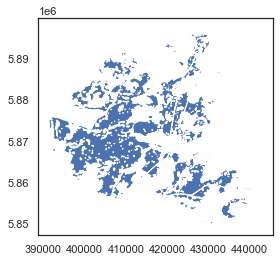

In [107]:
boundary.plot()

In [109]:
# Define the CRS information for your image
from rasterio.crs import CRS
# Open the cropped image to get the spatial information
with rasterio.open("C:\\Users\\magai\\Desktop\\master thesis\\sentinell2\\S2B_MSIL2A_20230508T100559_N0509_R022_T33UVU_20230508T131238.Berlin\\GRANULE\\Berlin_Image_Test_classification.tif") as src:
    # Retrieve the geotransform and coordinate reference system
    transform = src.transform
    crs = src.crs
    boundary.crs = src.crs
    from rasterio.mask import mask

    out, _ = mask(src, boundary.geometry, invert=False)

    # Define the output path for the TIFF image
    output_path =  "C:\\Users\\magai\\Desktop\\master thesis\\sentinell2\\S2B_MSIL2A_20230508T100559_N0509_R022_T33UVU_20230508T131238.Berlin\\GRANULE\\classified_mask_berlin.tif"

    # Open a new raster file in write mode
    with rasterio.open(output_path, 'w', driver='GTiff', width=sieved.shape[1], height=sieved.shape[0], count=1, dtype=sieved.dtype, crs=crs, transform=transform) as dst:
        print(out.shape)

        # Write the image data to the file
        dst.write(out)

(1, 2364, 2570)


In [110]:
np.unique(out[0], return_counts=True)

(array([0, 1, 2], dtype=uint16),
 array([4338173,  152276, 1585031], dtype=int64))

In [111]:
np.unique(sieved, return_counts=True)

(array([1, 2], dtype=uint16), array([1946846, 4128634], dtype=int64))

Raster CRS: EPSG:32633
Polygon CRS: epsg:32633


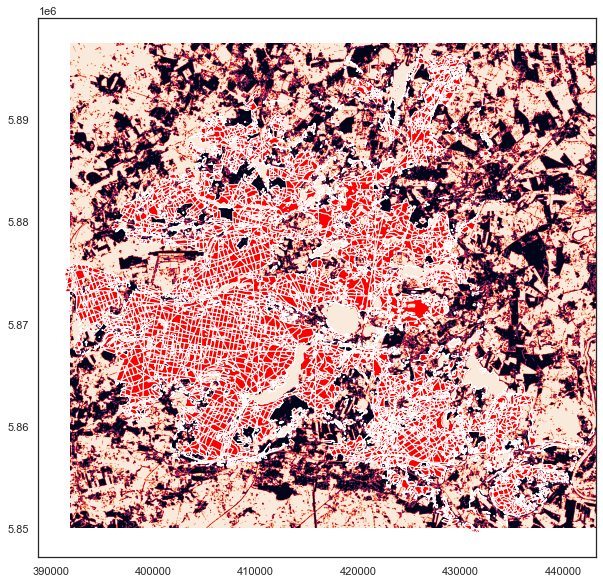

In [112]:
import rasterio.plot as rp

fig, ax = plt.subplots(figsize=(10, 10))
with rasterio.open("C:\\Users\\magai\\Desktop\\master thesis\\sentinell2\\S2B_MSIL2A_20230508T100559_N0509_R022_T33UVU_20230508T131238.Berlin\\GRANULE\\Berlin_Image_Test_classification.tif") as src:
    rp.show(src, ax=ax)
    print("Raster CRS:", src.crs)
    print("Polygon CRS:", df_forest_mask.crs)
df_forest_mask.plot(ax=ax, facecolor='red')
plt.show()

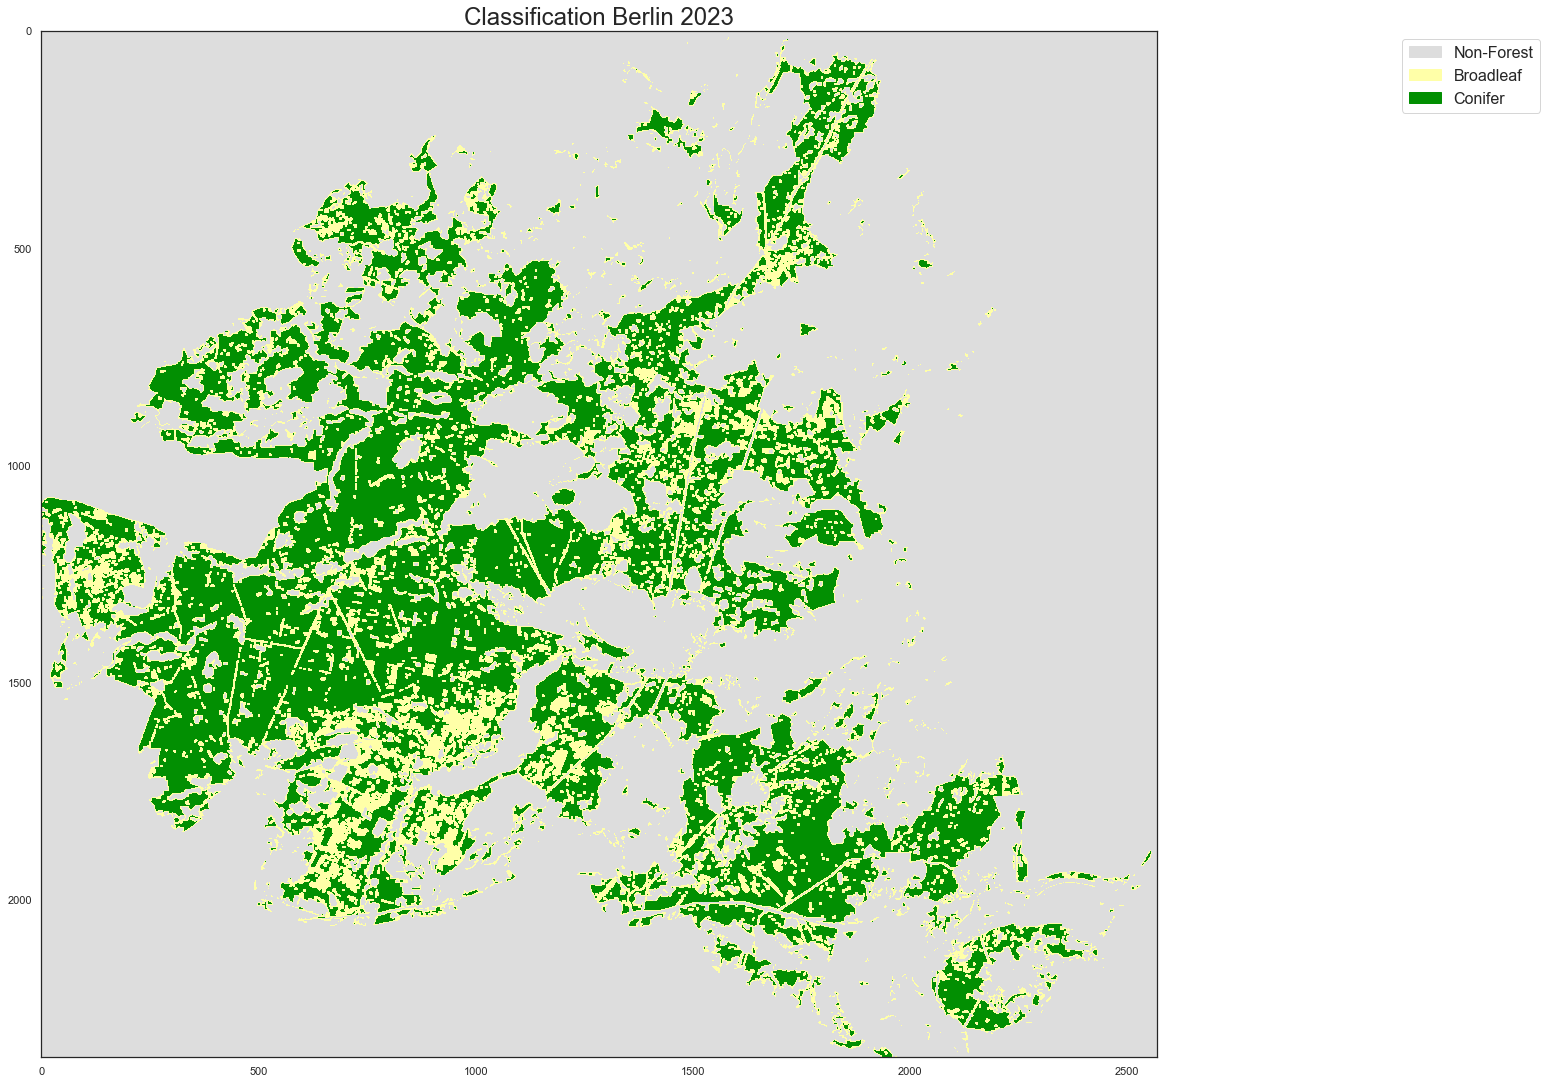

In [113]:
from matplotlib.patches import Patch
colors=["#DDDDDD", "#ffffa8", "#028f02"]#, "#f2a64d", "#ffd24d", "#aee21d","#02c500","#028f02", "#80f2e6"]
levels=[0, 1, 2] 

cmap, norm = matplotlib.colors.from_levels_and_colors(levels, colors, extend='max')
#cmap = matplotlib.colors.ListedColormap(colors)

fig, ax = plt.subplots(figsize=(20, 20))

chm_plot = ax.imshow(out[0],
                     cmap = cmap,                    
                     norm = norm)

ax.set_title("Classification Berlin 2023", fontsize=24)

# Add a legend for labels
legend_labels = {"#DDDDDD": "Non-Forest", 
                 "#ffffa8": "Broadleaf", 
                 "#028f02": "Conifer"}

patches = [Patch(color=color, label=label)
           for color, label in legend_labels.items()]

ax.legend(handles=patches,
          bbox_to_anchor=(1.35, 1),
          facecolor="white",
          fontsize= 16)

# ax.set_axis_off()
plt.show()